# Exercise 6-1: Support Vector Machines

In this exercise, we will be experimenting support vector machines (SVMs) on various example 2D datasets.

## Part 1: Loading and Visualizing Data

Load and visualizing the data from `ex6data1.mat`:

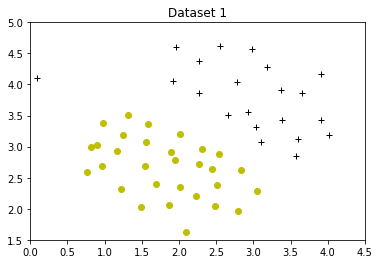

In [11]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from ex6data1
mat_data = sio.loadmat('../data/ex6data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

In [12]:
print(mat_data['y'].shape)

(51, 1)


In [13]:
print(mat_data['y'].ravel().shape)


(51,)


## Part 2: Training Linear SVM 

In `ex6data1.mat`, most of the positive and negative examples can be seperated by a single line. Train SVM with linear kernel with C = 1 and plot the decision boundary:

score: 0.9803921568627451


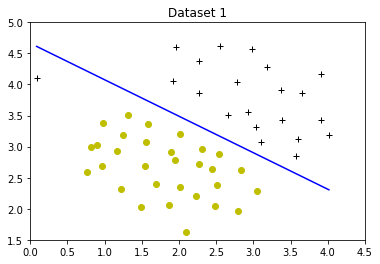

In [14]:
from sklearn import svm

from visualize_boundary_linear import visualize_boundary_linear


# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 1
clf = svm.LinearSVC(C=C) #Accedemos a diferentes clases de svm para clasificacion (este es el LinearSVC) 
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf) #Esta funcion pinta como es el modelo con nuestros datos. Vemos que se pinta una linea que separa los datos.  Como vemos en este caso es imposible en este caso clasificarlo todo correctamente pq siempre hay una cruz en la parte de abajo que dibujando una linea es imposible clsaificar.  Eso pasa porque estamos usando el modelo LinearSVC
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])  
plt.title("Dataset 1")
plt.show()

## Part 4: Visualizing Dataset 2

Load and visualizing the data from `ex6data2.mat`:

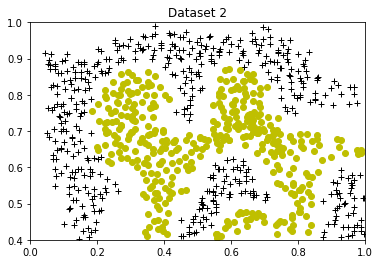

In [15]:
# Load from ex6data2
mat_data = sio.loadmat('../data/ex6data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 5: Training SVM with RBF Kernel (Dataset 2)

In `ex6data2.mat`, there is no linear decision boundary that separates the positive and negative examples. Train SVM with Gaussian kernel to learn a non-linear decision boundary and plot the decision boundary:

In [19]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(863, 2)
<class 'numpy.ndarray'>
(863,)
<class 'numpy.ndarray'>


score: 0.9895712630359212


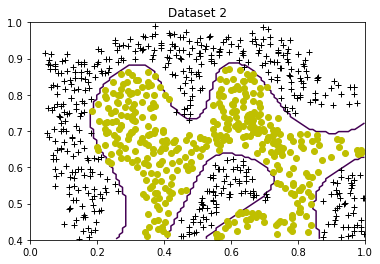

In [17]:
#Como vemos, es imposible que una linea recta pueda separar estos puntos, por lo tanto trabajamos con Kernels.  Los kernels transforman la dimensionalidad de los puntos y los proyectan de cierta manera para que sea mas facil dibujar una linea que los separe aunque tiene sus limitaciones, no es perfecto.

from visualize_boundary import visualize_boundary


# SVM Parameters
C = 1000
gamma = 10

# rbf -- Radial basis function
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma) #Ya utilizamos un modelo de SVC (no la linear) sino con un kernel rbf
clf.fit(X, y)
print ('score:', clf.score(X, y))

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()
#Aqui vemos que ha puesto la linea bastante bien. Es mas, tiene un score de un 96%  Sin embargo, el puso 1000 en C, en vez de 100 y la linea era mucho mejor (los + que aparecen por ahi en el medio estaban ya fuera de la linea) y tenia un 98%.  Todo esos parametros habria que comprobarlo

## Part 6: Visualizing Dataset 3 

Load and visualizing the data from `ex6data3.mat`:

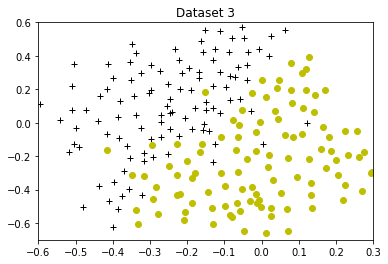

In [7]:
# Load from ex6data3
mat_data = sio.loadmat('../data/ex6data3.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
X_val = mat_data['Xval']
y_val = mat_data['yval'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()

## Part 7: Training SVM with RBF Kernel (Dataset 3)

To find the best parameters for SVM, the `data3_params()` trys differernt combination of C and gamma and returns the best choice of them for SVM with RBF kernel.

In [8]:
def data3_params(X, y, X_val, y_val):
    """
    Returns the best choice of C and gamma for SVM with RBF kernel.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels for training set.
    X_val : ndarray, shape (n_val_samples, n_features)
        Cross validation samples, where n_val_samples is the number of cross validation samples and n_features is the
        number of features.
    y_val : ndarray, shape (n_val_samples,)
        Labels for cross validation set.

    Returns
    -------
    C : float
        The best choice of penalty parameter C of the error term.
    gamma : float
        The best choice of kernel coefficient for 'rbf'.
    """
    C_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 1000, 100]
    gamma_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    max_score = -1
    C_pick = -1
    gamma_pick = -1
    #Realmente esto de abajo es lo que hace GRID SEARCH. Que le pasamos todas esos datos "C", "gamma_cands" etc, para probar para este algoritmo de SVC, o cualquier otro. Y nos evitamos todos los fors y tal ya que el GRID SEARCH se encarga de trabajar con fors por dentro.
    #ie.En un trabajo si la empresa trabaja por ejemplo con clasifiacion...pues meto mis algoritmos de clasificacion en el grid search (con los datos limpio) y el grid search se ENCARGA EL ALGORTIMO POR NOSOTROS. y tocara todos los detalles para encontrar lo mejor
    for C in C_cands: #Estamos probando diferentes candidatos
        for gamma in gamma_cands: #Estamos tambien probando diferentes candidatos
            clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(X, y)
            score = clf.score(X_val, y_val)
            if score > max_score:
                max_score = score
                C_pick = C
                gamma_pick = gamma

    return C_pick, gamma_pick

Train SVM and plot the decision boundary:

C 3
gamma 30
score: 0.965


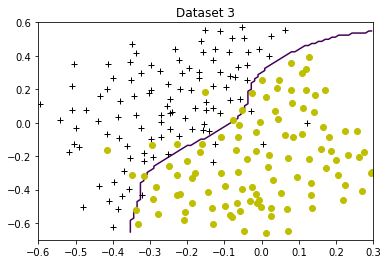

In [9]:
#Haciendo lo de la celda de arriba, lo que me sale abajo en la grafica es la mejor linea que ha podido sacar.  Seria con C = 3, y gamma = 30 y me da un 0.96% de acierto
C, gamma = data3_params(X, y, X_val, y_val)
print("C", C)
print("gamma", gamma)
# Train the SVM
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print ('score:', clf.score(X_val, y_val))

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()